In [ ]:
!pip install matplotlib
!pip install tensorflow
!pip install keras
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset download

In [ ]:
!curl https://www.bgc-jena.mpg.de/wetter/mpi_saale_2021b.zip -o mpi_saale_2021b.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1486k  100 1486k    0     0   493k      0  0:00:03  0:00:03 --:--:--  493k


In [ ]:
import zipfile
import pandas

zip_file = zipfile.ZipFile("mpi_saale_2021b.zip")
zip_file.extractall()
csv_path = "mpi_saale_2021b.csv"
data_frame = pandas.read_csv(csv_path)

In [ ]:
data_frame

,Date Time,p (mbar),T (degC),rh (%),sh (g/kg),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),...,ST008 (degC),ST016 (degC),ST032 (degC),ST064 (degC),ST128 (degC),SM008 (%),SM016 (%),SM032 (%),SM064 (%),SM128 (%)
0,01.07.2021 00:10:00,994.66,15.30,88.00,9.64,288.89,13.33,17.41,15.32,2.09,...,19.71,20.04,19.46,17.47,14.14,24.74,21.69,23.17,26.47,32.96
1,01.07.2021 00:20:00,994.60,15.16,89.90,9.76,288.76,13.52,17.26,15.51,1.74,...,19.67,20.02,19.46,17.47,14.14,24.74,21.69,23.17,26.47,32.95
2,01.07.2021 00:30:00,994.56,15.18,90.90,9.88,288.78,13.71,17.28,15.71,1.57,...,19.64,20.00,19.45,17.47,14.14,24.74,21.69,23.17,26.47,32.95
3,01.07.2021 00:40:00,994.55,15.73,86.70,9.76,289.33,13.52,17.90,15.52,2.38,...,19.61,19.98,19.45,17.47,14.14,24.73,21.69,23.17,26.47,32.95
4,01.07.2021 00:50:00,994.58,16.18,84.30,9.77,289.78,13.53,18.42,15.53,2.89,...,19.57,19.96,19.45,17.46,14.14,24.73,21.69,23.17,26.47,32.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,31.12.2021 23:20:00,1004.48,13.53,79.01,7.63,286.31,9.97,15.53,12.27,3.26,...,7.61,7.20,6.39,6.18,8.04,39.60,35.02,35.86,33.42,34.73
26492,31.12.2021 23:30:00,1004.54,13.49,79.09,7.62,286.27,9.94,15.49,12.25,3.24,...,7.62,7.21,6.40,6.18,8.04,39.60,35.02,35.85,33.42,34.74
26493,31.12.2021 23:40:00,1004.53,13.52,78.68,7.59,286.30,9.90,15.52,12.21,3.31,...,7.62,7.21,6.40,6.18,8.03,39.60,35.02,35.85,33.42,34.74
26494,31.12.2021 23:50:00,1004.62,13.55,78.32,7.57,286.32,9.86,15.55,12.18,3.37,...,7.63,7.22,6.41,6.19,8.04,39.60,35.02,35.85,33.42,34.74


# Dataset preparation

In [ ]:
time = data_frame['Date Time']
temperature = data_frame['T (degC)']
pressure = data_frame['p (mbar)']
relative_humidity = data_frame['rh (%)']
vapor_pressure = data_frame['VPact (mbar)']
wind_speed = data_frame['wv (m/s)']
airtight = data_frame['rho (g/m**3)']

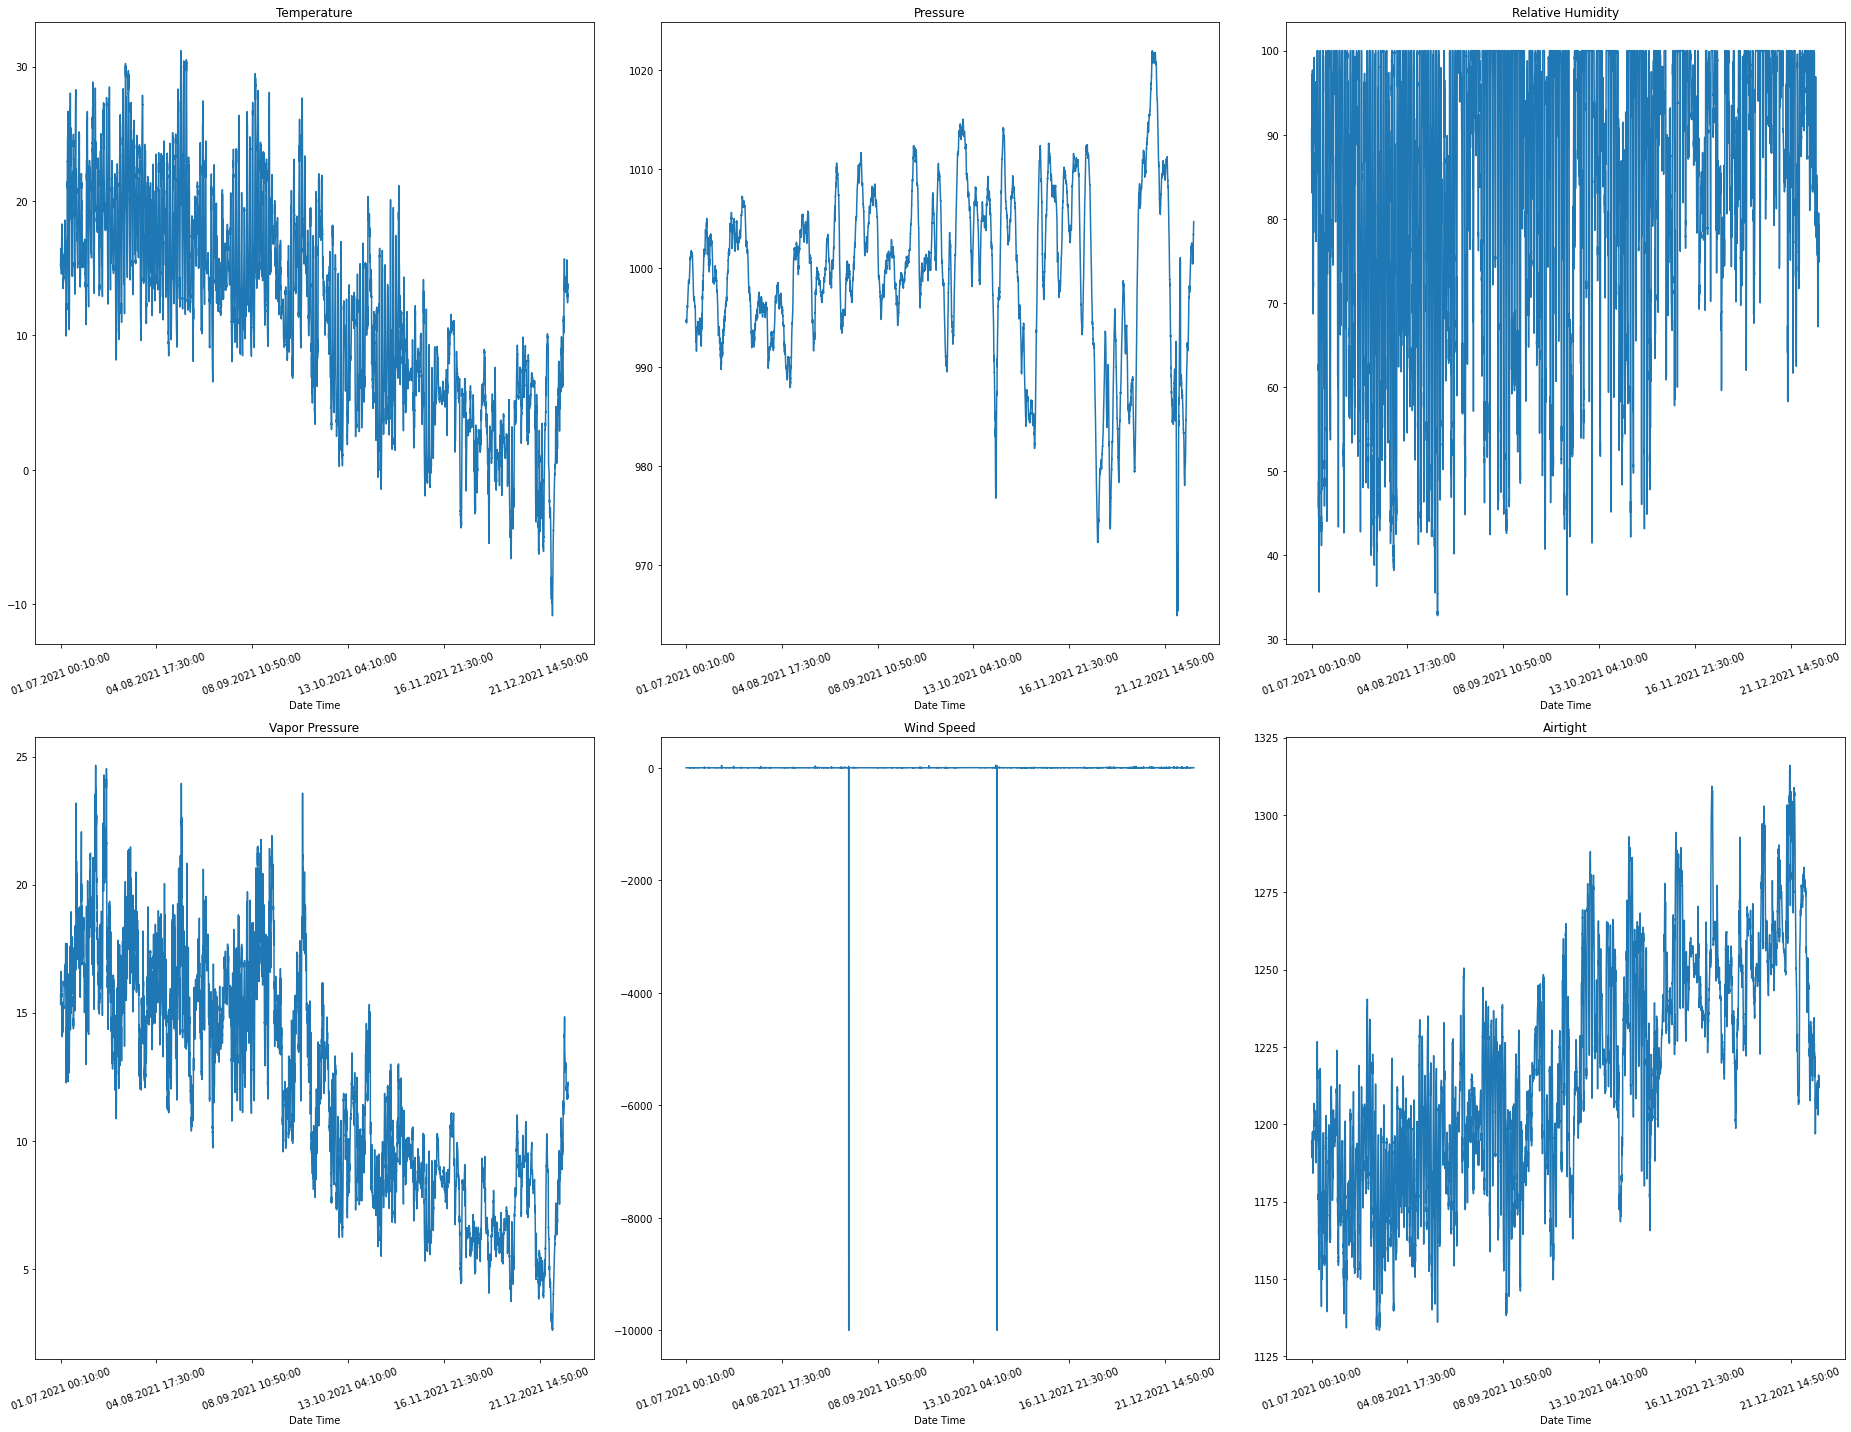

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.subplots(nrows=2, ncols=3, figsize=(26, 20))

ax = plt.subplot(2, 3, 1)
temperature.index = time
temperature.head()
temperature.plot(rot=20)
plt.title('Temperature')

ax = plt.subplot(2, 3, 2)
pressure.index = time
pressure.head()
pressure.plot(rot=20)
plt.title('Pressure')

ax = plt.subplot(2, 3, 3)
relative_humidity.index = time
relative_humidity.head()
relative_humidity.plot(rot=20)
plt.title('Relative Humidity')

ax = plt.subplot(2, 3, 4)
vapor_pressure.index = time
vapor_pressure.head()
vapor_pressure.plot(rot=20)
plt.title('Vapor Pressure')

ax = plt.subplot(2, 3, 5)
wind_speed.index = time
wind_speed.head()
wind_speed.plot(rot=20)
plt.title('Wind Speed')

ax = plt.subplot(2, 3, 6)
airtight.index = time
airtight.head()
airtight.plot(rot=20)
plt.title('Airtight')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

In [ ]:
features = pandas.concat([temperature, pressure, relative_humidity, vapor_pressure, wind_speed, airtight], axis=1)
features.index = time
features

,T (degC),p (mbar),rh (%),VPact (mbar),wv (m/s),rho (g/m**3)
Date Time,,,,,,
01.07.2021 00:10:00,15.30,994.66,88.00,15.32,0.52,1194.25
01.07.2021 00:20:00,15.16,994.60,89.90,15.51,0.56,1194.67
01.07.2021 00:30:00,15.18,994.56,90.90,15.71,1.09,1194.45
01.07.2021 00:40:00,15.73,994.55,86.70,15.52,1.09,1192.25
01.07.2021 00:50:00,16.18,994.58,84.30,15.53,1.28,1190.43
...,...,...,...,...,...,...
31.12.2021 23:20:00,13.53,1004.48,79.01,12.27,3.03,1214.96
31.12.2021 23:30:00,13.49,1004.54,79.09,12.25,3.22,1215.21
31.12.2021 23:40:00,13.52,1004.53,78.68,12.21,3.59,1215.09


In [ ]:
features = normalize(features.values)
features = pandas.DataFrame(features)
features

,0,1,2,3,4,5
0,0.503930,-0.586142,0.136120,0.737202,0.003771,-0.687664
1,0.485351,-0.593114,0.252726,0.780616,0.004097,-0.675877
2,0.488005,-0.597762,0.314097,0.826314,0.008410,-0.682051
3,0.560994,-0.598924,0.056337,0.782900,0.008410,-0.743794
4,0.620712,-0.595438,-0.090955,0.785185,0.009957,-0.794872
...,...,...,...,...,...,...
26491,0.269038,0.554893,-0.415611,0.040296,0.024199,-0.106443
26492,0.263729,0.561865,-0.410702,0.035726,0.025745,-0.099427
26493,0.267711,0.560703,-0.435864,0.026587,0.028756,-0.102795
26494,0.271692,0.571161,-0.457958,0.019732,0.028349,-0.102795


In [ ]:
training_size = int ( 0.8 * features.shape[0])  
train_data = features.loc[0 : training_size - 1]
val_data = features.loc[training_size:]

In [ ]:
start = 432 + 36
end = start + training_size

x_train = train_data.values
y_train = features.iloc[start:end][[0]]

sequence_length = int(432 / 6)

## Training dataset

In [ ]:
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=sequence_length,
    sampling_rate=6,
    batch_size=64,
)

## Validation dataset


In [ ]:
x_val_end = len(val_data) - start

label_start = training_size + start

x_val = val_data.iloc[:x_val_end][[i for i in range(6)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=6,
    batch_size=64,
)

# Training

In [ ]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "Weather_forcaster"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 72, 6)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                4992      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    dataset_train,
    epochs=15,
    validation_data=dataset_val
)

Epoch 1/15
325/325 [==============================] - 12s 37ms/step - loss: 0.1620 - val_loss: 0.3033
Epoch 2/15
325/325 [==============================] - 13s 39ms/step - loss: 0.1568 - val_loss: 0.3174
Epoch 3/15
325/325 [==============================] - 13s 39ms/step - loss: 0.1516 - val_loss: 0.3247
Epoch 4/15
325/325 [==============================] - 12s 38ms/step - loss: 0.1469 - val_loss: 0.3239
Epoch 5/15
325/325 [==============================] - 13s 41ms/step - loss: 0.1421 - val_loss: 0.3247
Epoch 6/15
325/325 [==============================] - 12s 38ms/step - loss: 0.1375 - val_loss: 0.3215
Epoch 7/15
325/325 [==============================] - 12s 38ms/step - loss: 0.1319 - val_loss: 0.3673
Epoch 8/15
325/325 [==============================] - 12s 38ms/step - loss: 0.1259 - val_loss: 0.3777
Epoch 9/15
325/325 [==============================] - 13s 40ms/step - loss: 0.1261 - val_loss: 0.2993
Epoch 10/15
325/325 [==============================] - 13s 39ms/step - loss: 0.120

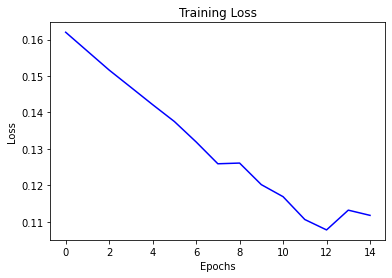

In [ ]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

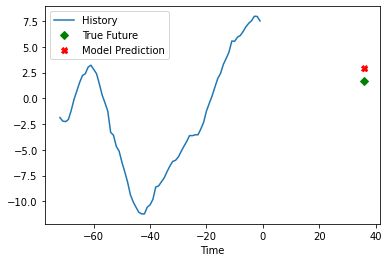

In [ ]:
temp_mean = temperature.mean(axis=0)
temp_std = temperature.std(axis=0)

for x, y in dataset_val.skip(12):
    history_data = x[0][:, 1].numpy() * temp_std + temp_mean
    true_value = y[0].numpy() * temp_std + temp_mean
    prediction = model.predict(x)[0] * temp_std + temp_mean
    time_steps = list(range(-(history_data.shape[0]), 0))
    plt.plot(time_steps, history_data)
    plt.plot(36, true_value, "gD")
    plt.plot(36, prediction, "rX")
    plt.legend(["History", "True Future", "Model Prediction"])
    plt.xlabel("Time")
    plt.show()
    break